In [12]:
import random
import matplotlib.pyplot as plt

In [13]:
# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [14]:
class FitnessMax():
    def __init__(self):
        self.values = [0]

# начальная приспособленость

In [15]:
class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()

# индивид в виде списка
# определен конструктор класса
# приспособленность данного индивида
# дальше это перейдет в Deap
# совместимость пакетов

In [16]:
def oneMaxFitness(individual):
    return sum(individual), # кортеж

# суммация всех

def individualCreator():
    return Individual([random.randint(0, 1) for i in range(ONE_MAX_LENGTH)])

# создает отдельного индивидуума

def populationCreator(n = 0):
    return list([individualCreator() for i in range(n)])

# создается популяция список из соответствующих индивидуумов

In [17]:
population = populationCreator(n=POPULATION_SIZE)
# размер популяции
generationCounter = 0
# счетчик числа поколений

fitnessValues = list(map(oneMaxFitness, population))
# функция map и для каждого индивидуума population вызовем функцию OneMaxFitness
# приспособленностей особей

for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue
# присваиваем новые функции приспособленности

maxFitnessValues = []
meanFitnessValues = []

In [18]:
def clone(value):
    ind = Individual(value[:])
    ind.fitness.values[0] = value.fitness.values[0]
    return ind

# клонение каждого индивидуума
# каждая ссылка - нет
# должен быть свой список

def selTournament(population, p_len):
    offspring = []
    for n in range(p_len):
        i1 = i2 = i3 = 0
        while i1 == i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), random.randint(0, p_len-1)
        # случайно подбираем трех особей и выбираем наиболее приспособленных
        offspring.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values[0]))
    # сохраняем лучшую коллекцию
    return offspring

def cxOnePoint(child1, child2):
    s = random.randint(2, len(child1)-3)
    child1[s:], child2[s:] = child2[s:], child1[s:]
    # точка разреза хромосомы и меняем части хромосом

def mutFlipBit(mutant, indpb=0.01):
    # мутации
    for indx in range(len(mutant)):
        if random.random() < indpb:
            mutant[indx] = 0 if mutant[indx] == 1 else 1
        # инверсия бита

In [19]:
fitnessValues = [individual.fitness.values[0] for individual in population]
# коллекция значение приспособленностей

In [20]:
# главный цикл до тех пор пока не найдем лучшее решений и максимум поколений
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population))
    # лучшие особи
    offspring = list(map(clone, offspring))
    # клонируем чтобы не было повторений

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # четная и нечетная особь
        if random.random() < P_CROSSOVER:
            cxOnePoint(child1, child2)
            # сработали - родители в потомков

    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutFlipBit(mutant, indpb=1.0/ONE_MAX_LENGTH)
            # мутации - вероятность мутации отдельных генов

    freshFitnessValues = list(map(oneMaxFitness, offspring))
    # приспособленность
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue

    population[:] = offspring
    # обновляем список популяции

    fitnessValues = [ind.fitness.values[0] for ind in population]

    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print(f"Поколение {generationCounter}: Макс приспособ. = {maxFitness}, Средняя приспособ.= {meanFitness}")

    best_index = fitnessValues.index(max(fitnessValues))
    print("Лучший индивидуум = ", *population[best_index], "\n")

Поколение 1: Макс приспособ. = 63, Средняя приспособ.= 53.53
Лучший индивидуум =  1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 

Поколение 2: Макс приспособ. = 66, Средняя приспособ.= 56.625
Лучший индивидуум =  1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 

Поколение 3: Макс приспособ. = 67, Средняя приспособ.= 59.245
Лучший индивидуум =  0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 

Поколение 4: Макс приспособ. = 70, Средняя приспособ.= 61.97
Лучший индивидуум =  1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 

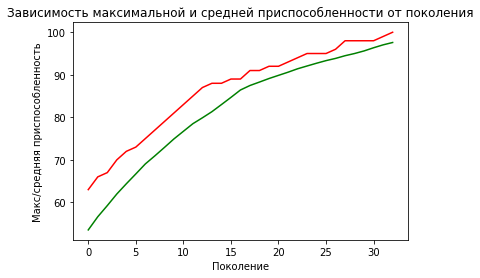

In [21]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

In [ ]:
# наиболее приспособленная особь из всех 1